In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:

df = pd.read_csv("./titanic.csv")
df.sample(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
639,640,0,3,"Thorneycroft, Mr. Percival",male,NaN,1,0,376564,16.1000,NaN,S
628,629,0,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,NaN,S
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
322,323,1,2,"Slayter, Miss. Hilda Mary",female,30.0,0,0,234818,12.3500,NaN,Q
646,647,0,3,"Cor, Mr. Liudevit",male,19.0,0,0,349231,7.8958,NaN,S
80,81,0,3,"Waelens, Mr. Achille",male,22.0,0,0,345767,9.0000,NaN,S
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,NaN,S
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
590,591,0,3,"Rintamaki, Mr. Matti",male,35.0,0,0,STON/O 2. 3101273,7.1250,NaN,S


In [5]:
# cuantos pasajeros iban?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


El df conteiene los datos de 891 pasajeros, es importante mencionar que hace falta informacion de pasajeros, como la edad y número de cabina.

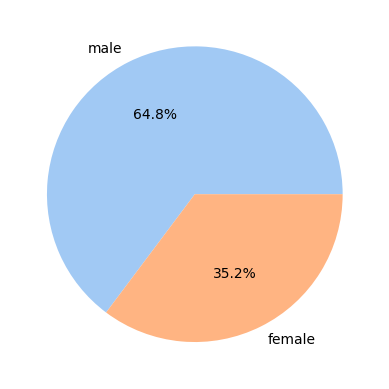

In [6]:
# cuantos hombre y mujeres
conteo_genero = df['Sex'].value_counts() # regresa una Serie  con la etiqueta y el conteo

plt.pie(conteo_genero, 
        labels=conteo_genero.index,
        autopct='%1.1f%%',
        colors=sns.color_palette('pastel'))

# plt.pie(df['Sex']); # recibe numeros
plt.show()

La figura anterior muestra las proporción de personas por género. **314 mujeres y 577 hombres.**

<Axes: ylabel='Frequency'>

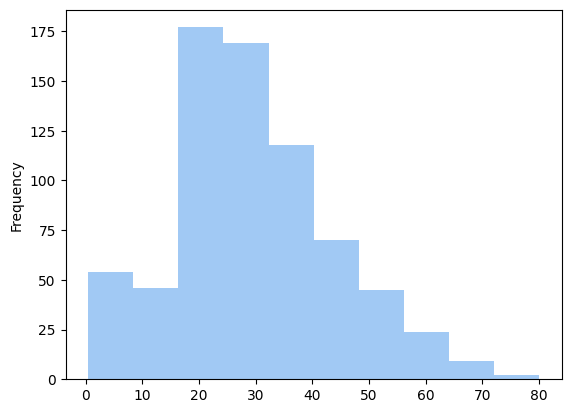

In [7]:

df.loc[:, "Age"].plot.hist(color=sns.color_palette('pastel'))

La edad de la mayoria de las edades de los pasajeros estaba entre los 20 y 30 años; sin embargo, también viajaban niños y adultos mayores, aunque era minoria.

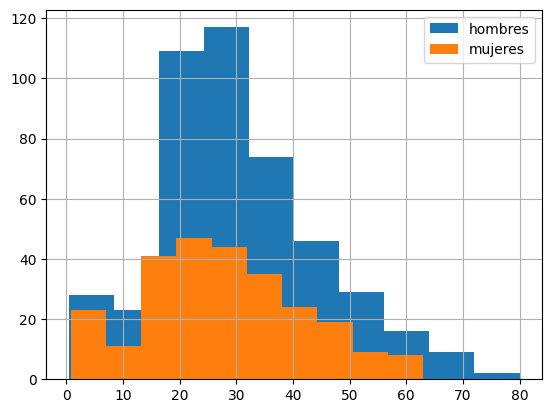

In [8]:

df.groupby("Sex").get_group("male")["Age"].hist()
df.groupby("Sex").get_group("female")["Age"].hist()
plt.legend(["hombres", "mujeres"])

Las distribuciones de edades por género se muestran en la figura 3, y se observa que la mayoria de mujeres eran jóvenes, de entre 15 y menos de 40 años. Las edades de la mayoria de los hombres estaba entre 18 y 40 años, aproximadamente

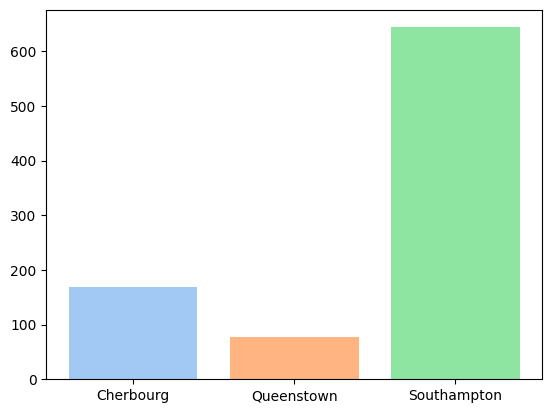

In [9]:

df.groupby("Embarked")["PassengerId"].count()
puerto = df.groupby("Embarked")["PassengerId"].count().index
frec = df.groupby("Embarked")["PassengerId"].count().values 

plt.bar(['Cherbourg', 'Queenstown', 'Southampton'], 
        frec, color=sns.color_palette('pastel'))

plt.show()

Se puede observar, en la figura 4, los tres puertos en ios cuales los pasajeros del Titanic embarcaron, Southampton fue el puerto en el que mas pasajeros subieron al barco, con un total de 644.En Cherbourg abordaron 168 pasajeros y en Queenstown solamente 77.

pclass y sex hacer narrativa de (barras) por clase y seprado por genero
1ra 2da 3ra mujeres
1ra 2da 3ra hombres

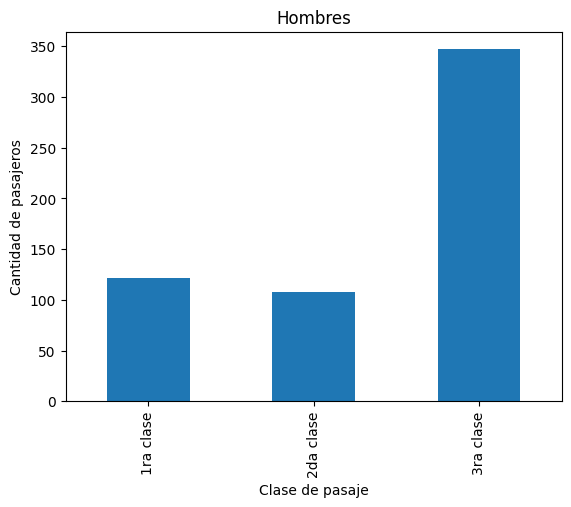

In [10]:
ax = df.groupby("Sex").get_group("male")["Pclass"].value_counts().sort_index().plot(kind='bar')

ax.set_xticks([0, 1, 2])
ax.set_xticklabels(["1ra clase", "2da clase", "3ra clase"]) 

plt.xlabel("Clase de pasaje")
plt.ylabel("Cantidad de pasajeros")
plt.title("Hombres")

# Mostrar la gráfica
plt.show()




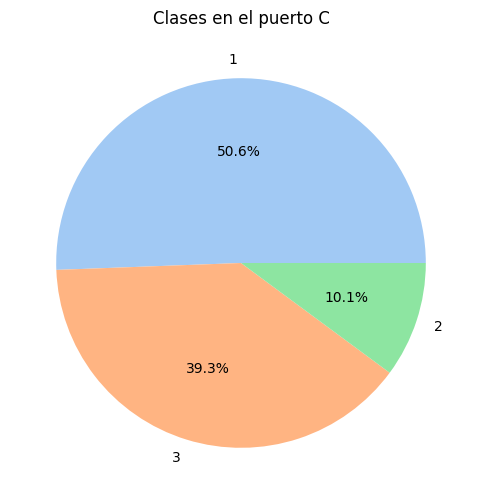

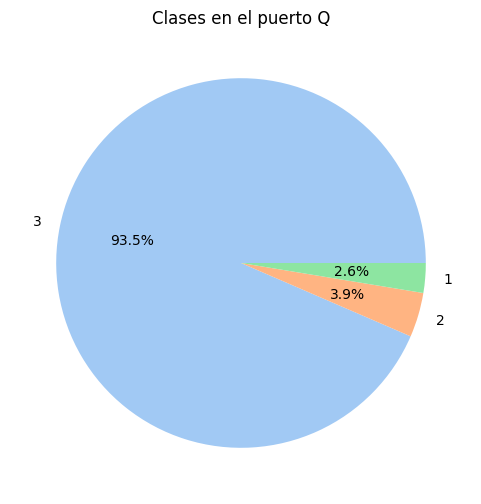

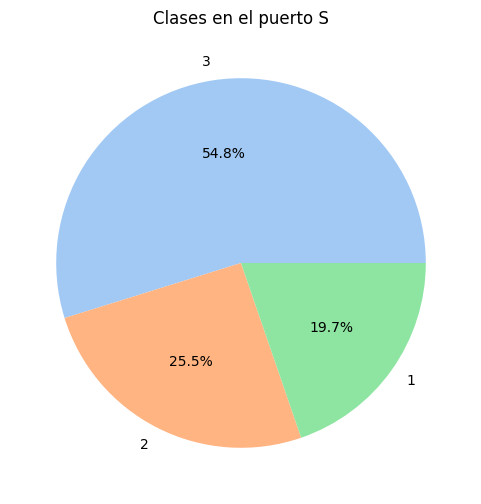

In [15]:

grupos = df.groupby('Embarked').groups

for puerto, indices in grupos.items():
    # print('Puerto:', puerto, ', Indices:', len(indices))
    
    # Filtramos los datos del puerto actual
    df_puerto = df.loc[indices]
    
    # Agrupamos por clase y contamos cuántos pasajeros hay en cada una
    clases = df_puerto['Pclass'].value_counts()
    
    # Creamos el gráfico de pastel
    plt.figure(figsize=(6, 6))  # Tamaño de la gráfica
    plt.pie(clases, 
            labels=clases.index,
            autopct='%1.1f%%', 
            colors=sns.color_palette('pastel'))  # Usamos una paleta de colores de seaborn
    plt.title(f'Clases en el puerto {puerto}')
    plt.show()

    # for cat, ind in clases.items(): 
    #     print(f"Clase {cat}: {ind}")


En el Titanic habian tres clases o categorias de boletos. La más cara fue la Clase 1, en la que 6 abordaron 214 personas. La Clase 2 fue la de precio intermedio, y en esa categoria hubieron 182 pasajeros. Finalmente, la Clase 3 fue la de menor precio, y la que tuvo la mayor cantidad de personas, con 491. La Tabla 1 muestra el puerto de origen y la cantidad de pasajeros por clase

In [20]:

puerto_clase = {
    'Queebstown':{'clase 3' :66,
                  'clase 2' :27,
                  'clase 1' :85
                  },
    'Cherbourg':{'clase 3' :72,
                 'clase 2' :3,
                 'clase 1' :2
                 },
    'Southampton':{'clase 3' :353,
                   'clase 2' :164, 
                   'clase 1' :127
                   }
}
puerto_clase = pd.DataFrame(puerto_clase)
puerto_clase

,Queebstown,Cherbourg,Southampton
clase 3,66,72,353
clase 2,27,3,164
clase 1,85,2,127
